In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
crashes = pd.read_csv('Traffic_Crashes_-_Crashes.csv')   # Downloaded CSV file from the link given in report
# crashes = pd.read_csv('https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv')

In [3]:
crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
# Get the minimum and maximum crash dates
min_date = crashes['CRASH_DATE'].min()
max_date = crashes['CRASH_DATE'].max()

print(f"The data ranges from {min_date} to {max_date}.")

The data ranges from 2013-03-03 16:48:00 to 2024-09-26 01:05:00.


In [4]:
# Now filter the data to only include dates from June 1, 2023 to December 31, 2023
start_date = '2023-06-01'
end_date = '2023-12-31'


crashes = crashes[(crashes['CRASH_DATE'] >= start_date) & (crashes['CRASH_DATE'] <= end_date)]

print(crashes.shape)

(66218, 48)


In [5]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66218 entries, 0 to 877302
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH_RECORD_ID                66218 non-null  object        
 1   CRASH_DATE_EST_I               4516 non-null   object        
 2   CRASH_DATE                     66218 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             66218 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         66218 non-null  object        
 5   DEVICE_CONDITION               66218 non-null  object        
 6   WEATHER_CONDITION              66218 non-null  object        
 7   LIGHTING_CONDITION             66218 non-null  object        
 8   FIRST_CRASH_TYPE               66218 non-null  object        
 9   TRAFFICWAY_TYPE                66218 non-null  object        
 10  LANE_CNT                       4 non-null      float64       
 11  ALIGNMENT          

In [6]:
crashes.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,2023-08-18 10:45:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN
5,b236c77d59e32b7b469a6e2f17f438b7457e1bd8bc689b...,NaN,2023-07-29 13:00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",07/29/2023 01:46:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1732,N,LA SALLE DR,1814.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,13,7,7,NaN,NaN,NaN


In [7]:
# creating a copy of data frame to use it for EDA
crashes_EDA = crashes.copy()

In [8]:
crashes['CRASH_TYPE'].value_counts(dropna = False)

CRASH_TYPE
NO INJURY / DRIVE AWAY              46890
INJURY AND / OR TOW DUE TO CRASH    19328
Name: count, dtype: int64

In [9]:
crashes.describe()

,CRASH_DATE,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,66218,66218.000000,4.000000,66218.000000,66218.000000,66218.000000,66055.000000,66055.000000,66055.000000,66055.000000,66055.000000,66055.000000,66055.0,66218.000000,66218.000000,66218.000000,65583.000000,65583.000000
mean,2023-09-14 02:14:46.858860032,28.642016,3.250000,3700.125933,1267.351944,2.039763,0.223223,0.001272,0.020332,0.126788,0.074832,1.984286,0.0,13.146033,4.133816,8.948171,41.856246,-87.672513
min,2023-06-01 00:30:00,0.000000,2.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,6.000000,0.000000,-87.917163
25%,2023-07-23 16:00:00,30.000000,2.750000,1332.000000,734.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,7.000000,41.787326,-87.722648
50%,2023-09-14 05:55:00,30.000000,3.500000,3222.000000,1215.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,9.000000,41.876787,-87.676691
75%,2023-11-04 06:56:15,30.000000,4.000000,5521.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,11.000000,41.927653,-87.636306
max,2023-12-30 23:50:00,70.000000,4.000000,13795.000000,6100.000000,18.000000,21.000000,2.000000,10.000000,12.000000,11.000000,48.000000,0.0,23.000000,7.000000,12.000000,42.022660,0.000000
std,NaN,5.561093,0.957427,2820.053379,704.143752,0.446553,0.619663,0.037299,0.168961,0.462398,0.359548,1.172497,0.0,5.673222,1.989527,1.976821,0.409581,0.840690


# Data Cleaning

## 1. Dropping Null rows and columns

In [10]:
# Set thresholds for dropping columns and rows

print(f"DataFrame shape before dropping: {crashes.shape}")

column_threshold = 0.3  # Drop columns with more than 30% missing values
row_threshold = 0.2      # Drop rows with more than 20% missing values

original_cols = crashes.columns.tolist()
# Calculate the threshold and drop columns with more than the specified percentage of missing values
col_threshold_value = int(column_threshold * len(crashes))
crashes.dropna(axis=1, thresh=col_threshold_value, inplace=True)


cleaned_cols = crashes.columns.tolist()


# Calculate the threshold and drop rows with more than the specified percentage of missing values
row_threshold_value = int(row_threshold * len(crashes.columns))
crashes.dropna(axis=0, thresh=row_threshold_value, inplace=True)

# Display the shape of the DataFrame after dropping
print(f"DataFrame shape after dropping: {crashes.shape}")
print(f"Dropping Columns are : {list(set(original_cols)-set(cleaned_cols))} since they have more than 30% Null Values")

DataFrame shape before dropping: (66218, 48)
DataFrame shape after dropping: (66218, 38)
Dropping Columns are : ['NOT_RIGHT_OF_WAY_I', 'CRASH_DATE_EST_I', 'WORK_ZONE_I', 'INTERSECTION_RELATED_I', 'PHOTOS_TAKEN_I', 'DOORING_I', 'STATEMENTS_TAKEN_I', 'WORK_ZONE_TYPE', 'LANE_CNT', 'WORKERS_PRESENT_I'] since they have more than 30% Null Values


## 2. Handling Missing Values

### 2.1 - Categorical Columns Missing Values

In [11]:
# Identify categorical columns
cat_cols = crashes.select_dtypes(include = ['object']).columns

# Get null counts for categorical columns
null_counts = crashes[cat_cols].isnull().sum()
null_counts

CRASH_RECORD_ID                0
TRAFFIC_CONTROL_DEVICE         0
DEVICE_CONDITION               0
WEATHER_CONDITION              0
LIGHTING_CONDITION             0
FIRST_CRASH_TYPE               0
TRAFFICWAY_TYPE                0
ALIGNMENT                      0
ROADWAY_SURFACE_COND           0
ROAD_DEFECT                    0
REPORT_TYPE                 2728
CRASH_TYPE                     0
HIT_AND_RUN_I              44618
DAMAGE                         0
DATE_POLICE_NOTIFIED           0
PRIM_CONTRIBUTORY_CAUSE        0
SEC_CONTRIBUTORY_CAUSE         0
STREET_DIRECTION               0
STREET_NAME                    0
MOST_SEVERE_INJURY           164
LOCATION                     635
dtype: int64

In [12]:
cat_cols = ['REPORT_TYPE','HIT_AND_RUN_I','MOST_SEVERE_INJURY']
for col in cat_cols:
    # Fill missing values with the mode
    mode_value = crashes[col].mode()[0]
    print(f"Column : {col} ; Mode Value : {mode_value}")
    crashes[col].fillna(mode_value, inplace=True)

Column : REPORT_TYPE ; Mode Value : NOT ON SCENE (DESK REPORT)
Column : HIT_AND_RUN_I ; Mode Value : Y
Column : MOST_SEVERE_INJURY ; Mode Value : NO INDICATION OF INJURY


### 2.2 Numerical Columns Missing Values

In [13]:
# Identify categorical columns
num_cols = crashes.select_dtypes(include = ['int64','float64']).columns

# Get null counts for numerical columns
null_counts = crashes[num_cols].isnull().sum()
null_counts

POSTED_SPEED_LIMIT                 0
STREET_NO                          0
BEAT_OF_OCCURRENCE                 0
NUM_UNITS                          0
INJURIES_TOTAL                   163
INJURIES_FATAL                   163
INJURIES_INCAPACITATING          163
INJURIES_NON_INCAPACITATING      163
INJURIES_REPORTED_NOT_EVIDENT    163
INJURIES_NO_INDICATION           163
INJURIES_UNKNOWN                 163
CRASH_HOUR                         0
CRASH_DAY_OF_WEEK                  0
CRASH_MONTH                        0
LATITUDE                         635
LONGITUDE                        635
dtype: int64

In [14]:
num_cols = null_counts[null_counts != 0].index.tolist()
for col in num_cols:
    # Fill missing values with the mode
    mode_value = crashes[col].mode()[0]
    print(f"Column : {col} ; Mode Value : {mode_value}")
    crashes[col].fillna(mode_value, inplace=True)

Column : INJURIES_TOTAL ; Mode Value : 0.0
Column : INJURIES_FATAL ; Mode Value : 0.0
Column : INJURIES_INCAPACITATING ; Mode Value : 0.0
Column : INJURIES_NON_INCAPACITATING ; Mode Value : 0.0
Column : INJURIES_REPORTED_NOT_EVIDENT ; Mode Value : 0.0
Column : INJURIES_NO_INDICATION ; Mode Value : 2.0
Column : INJURIES_UNKNOWN ; Mode Value : 0.0
Column : LATITUDE ; Mode Value : 41.976201139
Column : LONGITUDE ; Mode Value : -87.905309125


## 3. Outlier Detection and Treatment

In [15]:
# Capping the Outliers
crashes.loc[crashes['INJURIES_NO_INDICATION']>10,'INJURIES_NO_INDICATION'] = 10

## 4. Standardization of Numerical Features

In [16]:
# Select only numeric columns for standardization
num_cols = crashes.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the numeric columns
crashes[num_cols] = scaler.fit_transform(crashes[num_cols])
print(crashes[num_cols].describe())

       POSTED_SPEED_LIMIT     STREET_NO  BEAT_OF_OCCURRENCE     NUM_UNITS  \
count        6.621800e+04  6.621800e+04        6.621800e+04  6.621800e+04   
mean         5.107650e-17 -1.920734e-17       -1.510834e-16  2.824230e-16   
std          1.000008e+00  1.000008e+00        1.000008e+00  1.000008e+00   
min         -5.150468e+00 -1.312086e+00       -1.642222e+00 -2.328437e+00   
25%          2.441956e-01 -8.397514e-01       -7.574532e-01 -8.904408e-02   
50%          2.441956e-01 -1.695463e-01       -7.434894e-02 -8.904408e-02   
75%          2.441956e-01  6.456927e-01        7.905378e-01 -8.904408e-02   
max          7.437080e+00  3.579702e+00        6.863207e+00  3.574124e+01   

       INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
count    6.621800e+04    6.621800e+04             6.621800e+04   
mean    -8.584285e-19   -1.609553e-18            -1.545171e-17   
std      1.000008e+00    1.000008e+00             1.000008e+00   
min     -3.597346e-01   -3.405250e-02     

## 5. Dealing with Categorical Values and Inconsistency - Mapping

In [17]:
cat_cols = crashes.select_dtypes(include = ['object']).columns.tolist()
cat_cols

['CRASH_RECORD_ID',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'MOST_SEVERE_INJURY',
 'LOCATION']

In [18]:
traffic_control_mapping = {
    'TRAFFIC SIGNAL': 'SIGNAL',
    'FLASHING CONTROL SIGNAL': 'SIGNAL',
    'RAILROAD CROSSING GATE': 'SIGNAL',
    'STOP SIGN/FLASHER': 'STOP SIGN',  
    'STOP SIGN': 'STOP SIGN',            
    'YIELD': 'YIELD',                    
    'UNKNOWN': 'OTHER',                  
    'OTHER REG. SIGN': 'OTHER',     
    'WARNING SIGN': 'WARNING SIGN',      
    'OTHER WARNING SIGN': 'WARNING SIGN', 
    'OTHER SIGN': 'WARNING SIGN',        
    'BICYCLE CROSSING SIGN': 'CROSSING SIGN', 
    'PEDESTRIAN CROSSING SIGN': 'CROSSING SIGN', 
    'RR CROSSING SIGN': 'CROSSING SIGN',  
    'OTHER RAILROAD CROSSING': 'CROSSING SIGN', 
    'POLICE/FLAGMAN': 'POLICE',          
    'SCHOOL ZONE': 'SCHOOL ZONE',        
    'NO CONTROLS': 'NO CONTROLS',        
    'NO PASSING': 'OTHER',               
}

# Replace categories in the TRAFFIC_CONTROL_DEVICE column
crashes['TRAFFIC_CONTROL_DEVICE'] = crashes['TRAFFIC_CONTROL_DEVICE'].replace(traffic_control_mapping)

merged_counts = crashes['TRAFFIC_CONTROL_DEVICE'].value_counts()
print(merged_counts)

TRAFFIC_CONTROL_DEVICE
NO CONTROLS      35724
SIGNAL           18510
STOP SIGN         6516
OTHER             5117
YIELD              129
CROSSING SIGN      113
WARNING SIGN        46
DELINEATORS         23
POLICE              22
SCHOOL ZONE         18
Name: count, dtype: int64


In [19]:
weather_mapping = {
    'CLEAR': 'CLEAR',  
    'RAIN': 'RAIN',  
    'FREEZING RAIN/DRIZZLE': 'RAIN',  
    'CLOUDY/OVERCAST': 'CLOUDY/OVERCAST',  
    'SNOW': 'SNOW',  
    'SLEET/HAIL': 'SNOW',  
    'BLOWING SNOW': 'SNOW',  
    'FOG/SMOKE/HAZE': 'FOG/SMOKE/HAZE',  
    'UNKNOWN': 'OTHER',  
    'OTHER': 'OTHER',  
    'SEVERE CROSS WIND GATE': 'OTHER',  
    'BLOWING SAND, SOIL, DIRT': 'OTHER',  
}

# Replace values in the WEATHER column based on the mapping
crashes['WEATHER_CONDITION'] = crashes['WEATHER_CONDITION'].replace(weather_mapping)

# Optionally, you can now see the counts of the new categories
print(crashes['WEATHER_CONDITION'].value_counts())

WEATHER_CONDITION
CLEAR              51201
RAIN                7016
OTHER               5647
CLOUDY/OVERCAST     1810
SNOW                 370
FOG/SMOKE/HAZE       174
Name: count, dtype: int64


In [20]:
primary_cause_mapping = {
    'UNABLE TO DETERMINE': 'UNKNOWN',
    'FAILING TO YIELD RIGHT-OF-WAY': 'YIELDING ISSUES',
    'FOLLOWING TOO CLOSELY': 'FOLLOWING TOO CLOSELY',
    'IMPROPER OVERTAKING/PASSING': 'OVERTAKING ISSUES',
    'NOT APPLICABLE': 'NOT APPLICABLE',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'SPEEDING',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'DRIVING SKILLS',
    'IMPROPER TURNING/NO SIGNAL': 'TURNING ISSUES',
    'IMPROPER BACKING': 'BACKING ISSUES',
    'IMPROPER LANE USAGE': 'LANE USAGE',
    'DISREGARDING TRAFFIC SIGNALS': 'SIGNAL ISSUES',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'DRIVING SKILLS',
    'DISREGARDING STOP SIGN': 'SIGNAL ISSUES',
    'WEATHER': 'WEATHER',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'DRIVING SKILLS',
    'DISTRACTION - FROM INSIDE VEHICLE': 'DISTRACTION',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'OBSTRUCTED VIEW',
    'EQUIPMENT - VEHICLE CONDITION': 'VEHICLE CONDITION',
    'PHYSICAL CONDITION OF DRIVER': 'PHYSICAL CONDITION',
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'UNDER INFLUENCE',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'DISTRACTION',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'SIGNAL ISSUES',
    'ROAD CONSTRUCTION/MAINTENANCE': 'ROAD CONDITIONS',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'EVASIVE ACTION',
    'CELL PHONE USE OTHER THAN TEXTING': 'DISTRACTION',
    'TURNING RIGHT ON RED': 'TURNING ISSUES',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'ROAD CONDITIONS',
    'ANIMAL': 'ANIMALS',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'UNDER INFLUENCE',
    'RELATED TO BUS STOP': 'BUS STOP ISSUES',
    'DISREGARDING ROAD MARKINGS': 'SIGNAL ISSUES',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'DISTRACTION',
    'OBSTRUCTED CROSSWALKS': 'OBSTRUCTED VIEW',
    'TEXTING': 'DISTRACTION',
    'DISREGARDING YIELD SIGN': 'SIGNAL ISSUES',
    'PASSING STOPPED SCHOOL BUS': 'SIGNAL ISSUES',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'SIGNAL ISSUES',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'SIGNAL ISSUES',
}

# Apply the mapping to the dataframe
crashes['PRIM_CONTRIBUTORY_CAUSE'] = crashes['PRIM_CONTRIBUTORY_CAUSE'].replace(primary_cause_mapping)

# Optionally, you can now see the counts of the new categories
print(crashes['PRIM_CONTRIBUTORY_CAUSE'].value_counts())

PRIM_CONTRIBUTORY_CAUSE
UNKNOWN                  27734
YIELDING ISSUES           7578
FOLLOWING TOO CLOSELY     5469
DRIVING SKILLS            3879
OVERTAKING ISSUES         3650
NOT APPLICABLE            3626
SPEEDING                  2683
TURNING ISSUES            2371
SIGNAL ISSUES             2186
BACKING ISSUES            2089
LANE USAGE                1948
DISTRACTION                759
WEATHER                    506
OBSTRUCTED VIEW            396
VEHICLE CONDITION          359
PHYSICAL CONDITION         315
UNDER INFLUENCE            276
ROAD CONDITIONS            178
EVASIVE ACTION             100
ANIMALS                     59
BUS STOP ISSUES             57
Name: count, dtype: int64


## 6. DataType Change

In [21]:
crashes['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes['DATE_POLICE_NOTIFIED'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [22]:
# Convert columns to category data type
crashes['CRASH_HOUR'] = crashes['CRASH_HOUR'].astype('category')
crashes['CRASH_DAY_OF_WEEK'] = crashes['CRASH_DAY_OF_WEEK'].astype('category')
crashes['CRASH_MONTH'] = crashes['CRASH_MONTH'].astype('category')


## 7. Redundant Columns

In [23]:
# Removing these redundant columns as they are of little use in analysis or found in other columns info

redundant_cols = ['LOCATION','SEC_CONTRIBUTORY_CAUSE','STREET_DIRECTION','STREET_NAME','STREET_NO']



In [24]:
crashes.drop(columns = redundant_cols, inplace = True)

In [25]:
crashes.shape

(66218, 33)

## 8. Temporal Consistency Checks

In [26]:
# Check for logical consistency: Accidents should be recorded before they are notified
invalid_dates = crashes[crashes['CRASH_DATE'] > crashes['DATE_POLICE_NOTIFIED']]
print(f"Invalid Date Records: {len(invalid_dates)}")
print(invalid_dates[['CRASH_DATE', 'DATE_POLICE_NOTIFIED']])

# Check for time gaps (duplicates on the same date)
duplicate_dates = crashes[crashes.duplicated(subset=['CRASH_DATE'], keep=False)]
print(f"Duplicate Date Records: {len(duplicate_dates)}")
print(duplicate_dates[['CRASH_DATE']].value_counts())

Invalid Date Records: 0
Empty DataFrame
Columns: [CRASH_DATE, DATE_POLICE_NOTIFIED]
Index: []
Duplicate Date Records: 34419
CRASH_DATE         
2023-06-10 16:00:00    14
2023-06-01 16:30:00    13
2023-09-20 08:00:00    11
2023-10-05 08:30:00    11
2023-07-07 18:30:00    11
                       ..
2023-09-01 07:55:00     2
2023-12-30 16:44:00     2
2023-12-30 16:30:00     2
2023-12-30 15:50:00     2
2023-12-30 15:45:00     2
Name: count, Length: 11996, dtype: int64


## 9. Cross-Validation of Related Columns

In [27]:
# Check for logical relationships
# Example: If INJURIES_TOTAL > 0, then MOST_SEVERE_INJURY cannot be "NO INDICATION OF INJURY"
invalid_injury_records = crashes[(crashes['INJURIES_TOTAL'] > 0) & 
                                  (crashes['MOST_SEVERE_INJURY'] == 'NO INDICATION OF INJURY')]
print(f"Invalid Injury Records: {len(invalid_injury_records)}")
print(invalid_injury_records[['INJURIES_TOTAL', 'MOST_SEVERE_INJURY']])

# Check for consistency between WEATHER_CONDITION and LIGHTING_CONDITION
# Example: If WEATHER_CONDITION is "SNOW", LIGHTING_CONDITION should not be "DAYLIGHT"
invalid_weather_lighting = crashes[(crashes['WEATHER_CONDITION'] == 'SNOW') & 
                                    (crashes['LIGHTING_CONDITION'] == 'DAYLIGHT')]
print(f"Invalid Weather and Lighting Records: {len(invalid_weather_lighting)}")
print(invalid_weather_lighting[['WEATHER_CONDITION', 'LIGHTING_CONDITION']])

Invalid Injury Records: 0
Empty DataFrame
Columns: [INJURIES_TOTAL, MOST_SEVERE_INJURY]
Index: []
Invalid Weather and Lighting Records: 230
       WEATHER_CONDITION LIGHTING_CONDITION
388                 SNOW           DAYLIGHT
12948               SNOW           DAYLIGHT
13069               SNOW           DAYLIGHT
13070               SNOW           DAYLIGHT
13118               SNOW           DAYLIGHT
...                  ...                ...
854715              SNOW           DAYLIGHT
859645              SNOW           DAYLIGHT
860110              SNOW           DAYLIGHT
860320              SNOW           DAYLIGHT
876465              SNOW           DAYLIGHT

[230 rows x 2 columns]


## 10. Categorical Encoding

In [28]:
cat_cols = crashes.select_dtypes(include = ['object']).columns.tolist()
cat_cols

['CRASH_RECORD_ID',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'MOST_SEVERE_INJURY']

### 10.1 Ordinal Encoding

In [29]:
# Define the ordinal mappings for each column
lighting_condition_mapping = {
    'DAYLIGHT': 1,
    'DARKNESS, LIGHTED ROAD': 2,
    'DARKNESS': 3,
    'DUSK': 4,
    'DAWN': 5,
    'UNKNOWN': 6
}

most_severe_injury_mapping = {
    'NO INDICATION OF INJURY': 1,
    'NONINCAPACITATING INJURY': 2,
    'REPORTED, NOT EVIDENT': 3,
    'INCAPACITATING INJURY': 4,
    'FATAL': 5
}

report_type_mapping = {
    'NOT ON SCENE (DESK REPORT)': 1,
    'ON SCENE': 2
}

crash_type_mapping = {
    'NO INJURY / DRIVE AWAY': 1,
    'INJURY AND / OR TOW DUE TO CRASH': 2
}

hit_and_run_mapping = {
    'Y': 1,
    'N': 0
}

damage_mapping = {
    'OVER $1,500': 3,
    '$501 - $1,500': 2,
    '$500 OR LESS': 1
}

# Apply the mappings to the respective columns
crashes['LIGHTING_CONDITION'] = crashes['LIGHTING_CONDITION'].replace(lighting_condition_mapping)
crashes['MOST_SEVERE_INJURY'] = crashes['MOST_SEVERE_INJURY'].replace(most_severe_injury_mapping)
crashes['REPORT_TYPE'] = crashes['REPORT_TYPE'].replace(report_type_mapping)
crashes['CRASH_TYPE'] = crashes['CRASH_TYPE'].replace(crash_type_mapping)
crashes['HIT_AND_RUN_I'] = crashes['HIT_AND_RUN_I'].replace(hit_and_run_mapping)
crashes['DAMAGE'] = crashes['DAMAGE'].replace(damage_mapping)

# Check the updated DataFrame
crashes[['LIGHTING_CONDITION', 'MOST_SEVERE_INJURY', 'REPORT_TYPE', 'CRASH_TYPE', 'HIT_AND_RUN_I', 'DAMAGE']].head()


,LIGHTING_CONDITION,MOST_SEVERE_INJURY,REPORT_TYPE,CRASH_TYPE,HIT_AND_RUN_I,DAMAGE
0,1,2,2,2,1,3
1,1,1,2,1,1,3
2,1,2,2,2,1,2
4,1,1,2,1,1,3
5,1,1,1,1,1,2


### 10.2 Nominal Encoding

In [30]:
columns_for_nominal_encoding = [
     'TRAFFIC_CONTROL_DEVICE',
     'DEVICE_CONDITION',
     'WEATHER_CONDITION',
     'FIRST_CRASH_TYPE',
     'TRAFFICWAY_TYPE',
     'ALIGNMENT',
     'ROADWAY_SURFACE_COND',
     'ROAD_DEFECT',
     'PRIM_CONTRIBUTORY_CAUSE'
]

# Apply one-hot encoding for nominal columns
crashes = pd.get_dummies(crashes, columns=columns_for_nominal_encoding, drop_first=True)

# Check the updated DataFrame
crashes.head()


,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,LIGHTING_CONDITION,REPORT_TYPE,CRASH_TYPE,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_OTHER,TRAFFIC_CONTROL_DEVICE_POLICE,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_SIGNAL,TRAFFIC_CONTROL_DEVICE_STOP SIGN,TRAFFIC_CONTROL_DEVICE_WARNING SIGN,TRAFFIC_CONTROL_DEVICE_YIELD,DEVICE_CONDITION_FUNCTIONING PROPERLY,DEVICE_CONDITION_MISSING,DEVICE_CONDITION_NO CONTROLS,DEVICE_CONDITION_NOT FUNCTIONING,DEVICE_CONDITION_OTHER,DEVICE_CONDITION_UNKNOWN,DEVICE_CONDITION_WORN REFLECTIVE MATERIAL,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SNOW,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED),TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,"TRAFFICWAY_TYPE_FIVE POINT, OR MORE",TRAFFICWAY_TYPE_FOUR WAY,TRAFFICWAY_TYPE_L-INTERSECTION,TRAFFICWAY_TYPE_NOT DIVIDED,TRAFFICWAY_TYPE_NOT REPORTED,TRAFFICWAY_TYPE_ONE-WAY,TRAFFICWAY_TYPE_OTHER,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_ROUNDABOUT,TRAFFICWAY_TYPE_T-INTERSECTION,TRAFFICWAY_TYPE_TRAFFIC ROUTE,TRAFFICWAY_TYPE_UNKNOWN,TRAFFICWAY_TYPE_UNKNOWN INTERSECTION TYPE,TRAFFICWAY_TYPE_Y-INTERSECTION,ALIGNMENT_CURVE ON HILLCREST,"ALIGNMENT_CURVE, LEVEL",ALIGNMENT_STRAIGHT AND LEVEL,ALIGNMENT_STRAIGHT ON GRADE,ALIGNMENT_STRAIGHT ON HILLCREST,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_NO DEFECTS,ROAD_DEFECT_OTHER,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_UNKNOWN,ROAD_DEFECT_WORN SURFACE,PRIM_CONTRIBUTORY_CAUSE_BACKING ISSUES,PRIM_CONTRIBUTORY_CAUSE_BUS STOP ISSUES,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS,PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED VIEW,PRIM_CONTRIBUTORY_CAUSE_OVERTAKING ISSUES,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION,PRIM_CONTRIBUTORY_CAUSE_ROAD CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_SIGNAL ISSUES,PRIM_CONTRIBUTORY_CAUSE_SPEEDING,PRIM_CONTRIBUTORY_CAUSE_TURNING ISSUES,PRIM_CONTRIBUTORY_CAUSE_UNDER INFLUENCE,PRIM_CONTRIBUTORY_CAUSE_UNKNOWN,PRIM_CONTRIBUTORY_CAUSE_VEHICLE CONDITION,PRIM_CONTRIBUTORY_CAUSE_WEATHER,PRIM_CONTRIBUTORY_CAUSE_YIELDING ISSUES
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,2023-08-18 12:50:00,-2.453136,1,2,2,1,3,2023-08-18 12:55:00,0.549108,-0.089044,2,1.255790,-0.034052,-0.120183,1.891284,-0.207861,-0.890822,0.0,-0.202009,0.938011,-0.479648,0.291347,-0.275481,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False

In [31]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66218 entries, 0 to 877302
Columns: 118 entries, CRASH_RECORD_ID to PRIM_CONTRIBUTORY_CAUSE_YIELDING ISSUES
dtypes: bool(94), category(3), datetime64[ns](2), float64(12), int64(6), object(1)
memory usage: 17.2+ MB


In [32]:
crashes.isna().sum().sum()

np.int64(0)

In [33]:
crashes.shape

(66218, 118)

# Exploratory Data Analysis - EDA

In [34]:
crashes_EDA.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,2023-08-18 12:50:00,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,2023-07-29 14:45:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,2023-08-18 17:58:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"$501 - $1,500",08/18/2023 06:01:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,3422,N,LONG AVE,1633.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,2023-08-18 10:45:00,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/18/2023 10:48:00 AM,FOLLOWING TOO CLOSELY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3,W,TERMINAL ST,1653.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN
5,b236c77d59e32b7b469a6e2f17f438b7457e1bd8bc689b...,NaN,2023-07-29 13:00:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",07/29/2023 01:46:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1732,N,LA SALLE DR,1814.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,13,7,7,NaN,NaN,NaN


##  1. Summary Statistics

In [35]:
crashes_EDA.describe()

,CRASH_DATE,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,66218,66218.000000,4.000000,66218.000000,66218.000000,66218.000000,66055.000000,66055.000000,66055.000000,66055.000000,66055.000000,66055.000000,66055.0,66218.000000,66218.000000,66218.000000,65583.000000,65583.000000
mean,2023-09-14 02:14:46.858860032,28.642016,3.250000,3700.125933,1267.351944,2.039763,0.223223,0.001272,0.020332,0.126788,0.074832,1.984286,0.0,13.146033,4.133816,8.948171,41.856246,-87.672513
min,2023-06-01 00:30:00,0.000000,2.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,6.000000,0.000000,-87.917163
25%,2023-07-23 16:00:00,30.000000,2.750000,1332.000000,734.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,7.000000,41.787326,-87.722648
50%,2023-09-14 05:55:00,30.000000,3.500000,3222.000000,1215.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,9.000000,41.876787,-87.676691
75%,2023-11-04 06:56:15,30.000000,4.000000,5521.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,11.000000,41.927653,-87.636306
max,2023-12-30 23:50:00,70.000000,4.000000,13795.000000,6100.000000,18.000000,21.000000,2.000000,10.000000,12.000000,11.000000,48.000000,0.0,23.000000,7.000000,12.000000,42.022660,0.000000
std,NaN,5.561093,0.957427,2820.053379,704.143752,0.446553,0.619663,0.037299,0.168961,0.462398,0.359548,1.172497,0.0,5.673222,1.989527,1.976821,0.409581,0.840690


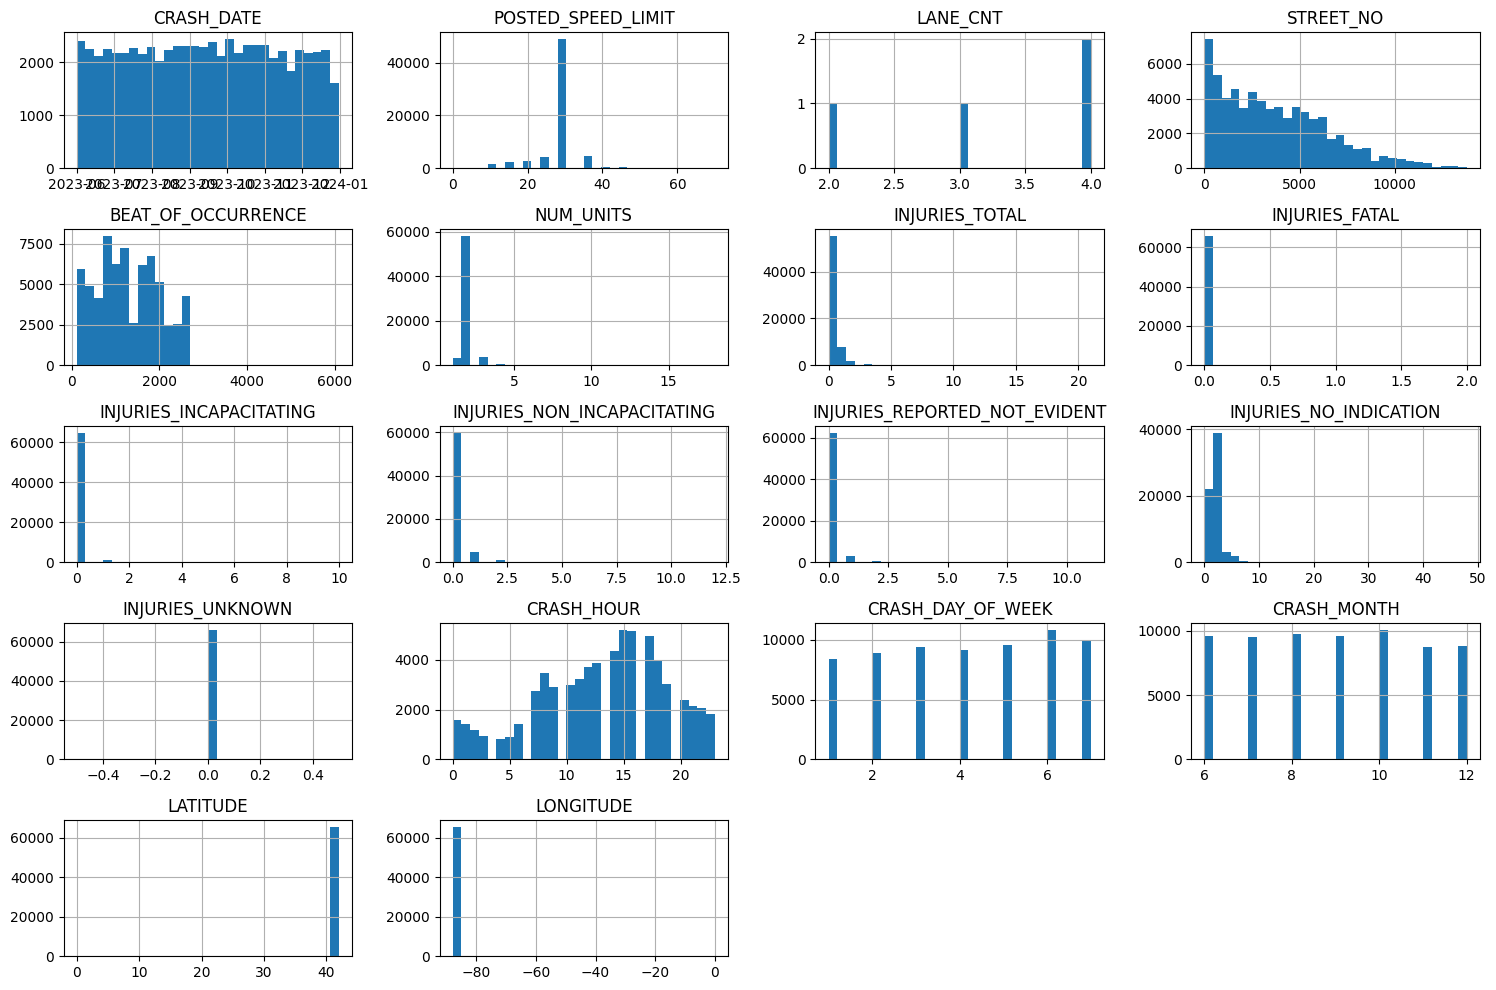

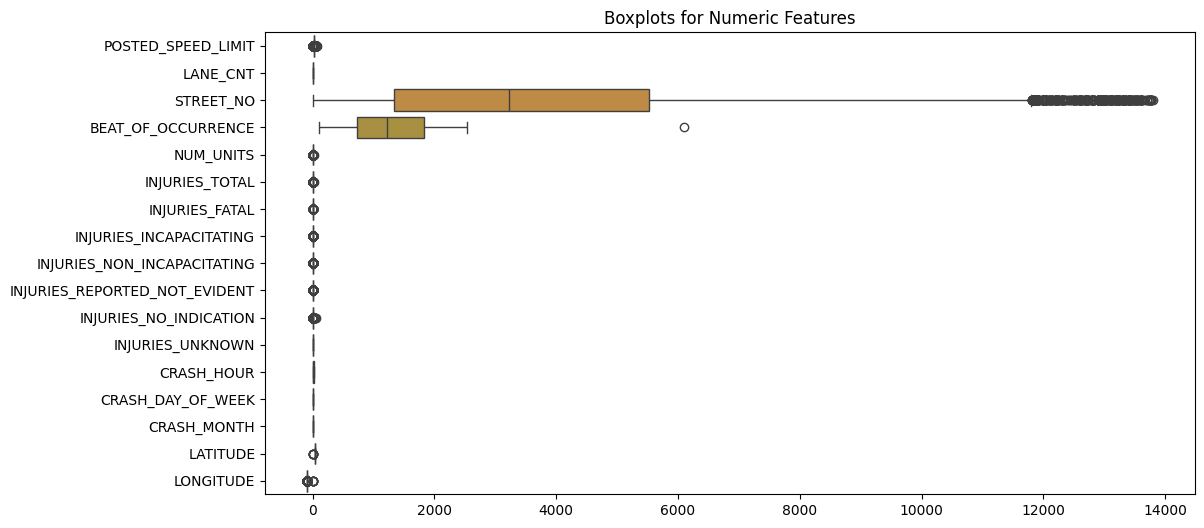

In [36]:
# Plot histograms for numerical features
crashes_EDA.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot boxplots to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=crashes_EDA, orient="h")
plt.title('Boxplots for Numeric Features')
plt.show()

## 2. Binning Hours and Analyzing Distribution of Accidents

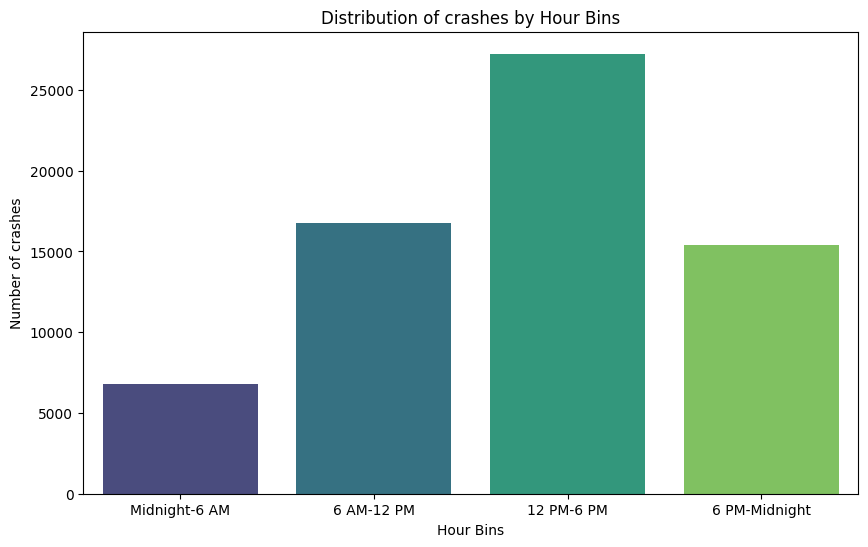

In [37]:
# Creating bins for hours
bins = [0, 6, 12, 18, 24]
labels = ['Midnight-6 AM', '6 AM-12 PM', '12 PM-6 PM', '6 PM-Midnight']
HOUR_BIN = pd.cut(crashes_EDA['CRASH_HOUR'], bins=bins, labels=labels, right=False)

# Plotting distribution of crashes_EDA by hour bins
plt.figure(figsize=(10, 6))
sns.countplot(data=crashes_EDA, x=HOUR_BIN, order=labels, palette = 'viridis')
plt.title('Distribution of crashes by Hour Bins')
plt.xlabel('Hour Bins')
plt.ylabel('Number of crashes')
plt.show()

## 3. Geographical Distribution of Accidents

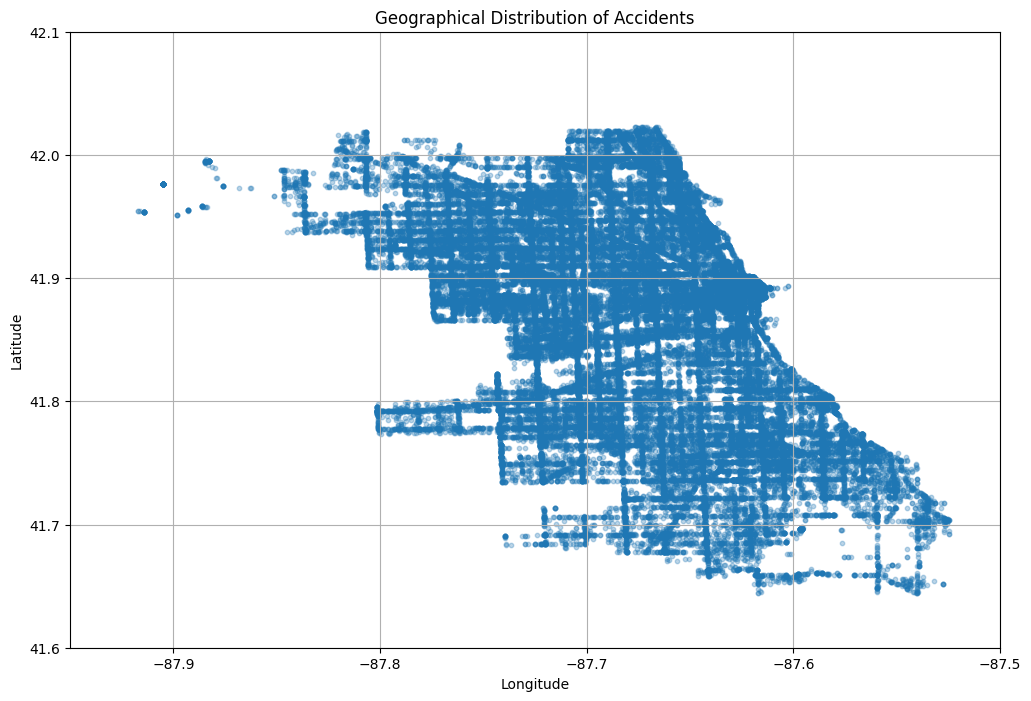

In [38]:
# Creating scatter plot for Latitude and Longitude
plt.figure(figsize=(12, 8))
plt.scatter(crashes_EDA['LONGITUDE'], crashes_EDA['LATITUDE'], alpha=0.3, s=10)
plt.title('Geographical Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.xlim(-87.95, -87.5)  # Longitude range
plt.ylim(41.6, 42.1)    # Latitude range
plt.show()


## 4. Traffic Accidents by Months

<Figure size 1000x600 with 0 Axes>

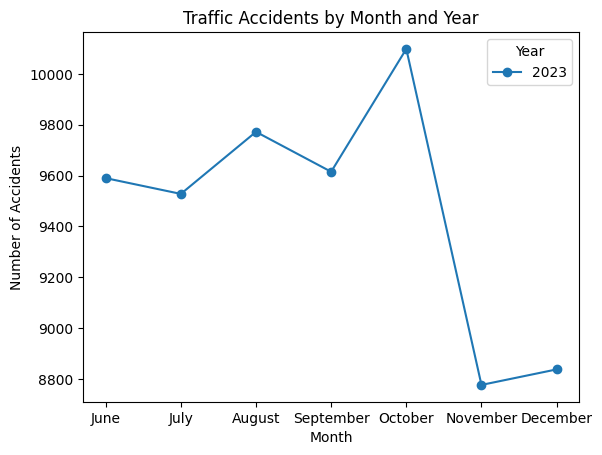

In [39]:
# Extract month and year
year = crashes_EDA['CRASH_DATE'].dt.year
month = crashes_EDA['CRASH_DATE'].dt.month_name()

# Group by Year and Month
monthly_accidents = crashes_EDA.groupby([year, pd.Categorical(month, categories=[
    'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)]).size().unstack(fill_value=0)


# Plot
plt.figure(figsize=(10, 6))
monthly_accidents.T.plot(kind='line', marker='o')
plt.title('Traffic Accidents by Month and Year')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Year')
plt.show()


## 5. Total Accidents by Primary Cause of Traffic Accidents

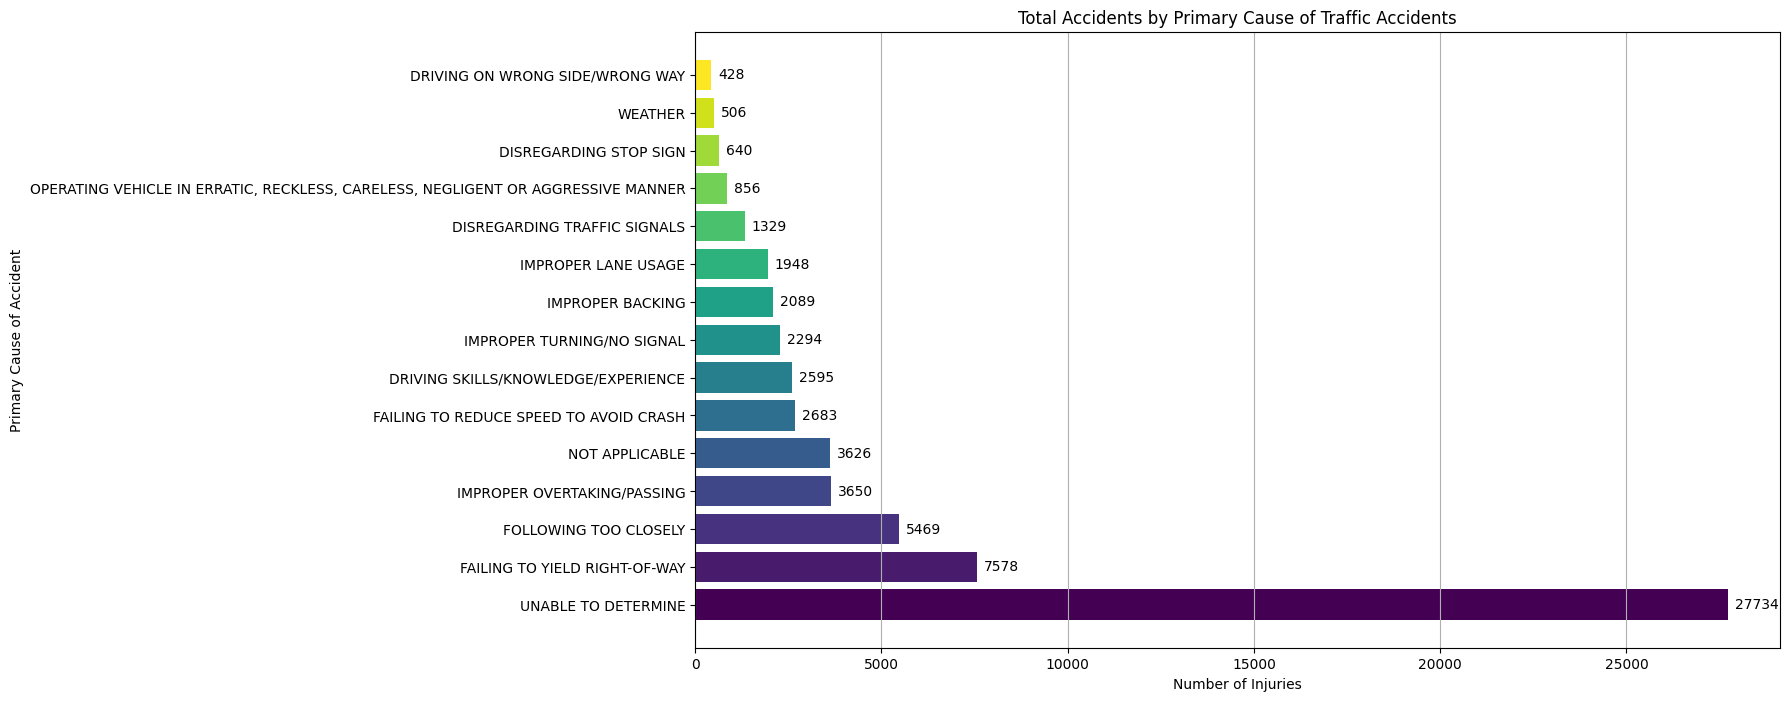

In [40]:
# Group by Primary Contributory Cause
injuries_by_cause = crashes_EDA['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(injuries_by_cause[:15].index, injuries_by_cause[:15].values, color=plt.cm.viridis(np.linspace(0, 1, len(injuries_by_cause[:15].index))))
ax.set_title('Total Accidents by Primary Cause of Traffic Accidents')
ax.set_xlabel('Number of Injuries')
ax.set_ylabel('Primary Cause of Accident')
ax.grid(axis='x')

# Adding numbers beside each bar using axis bar_label function
ax.bar_label(bars, fmt='%.0f', label_type='edge', padding=5)
plt.show()


## 6. Weather and Lighting Conditions

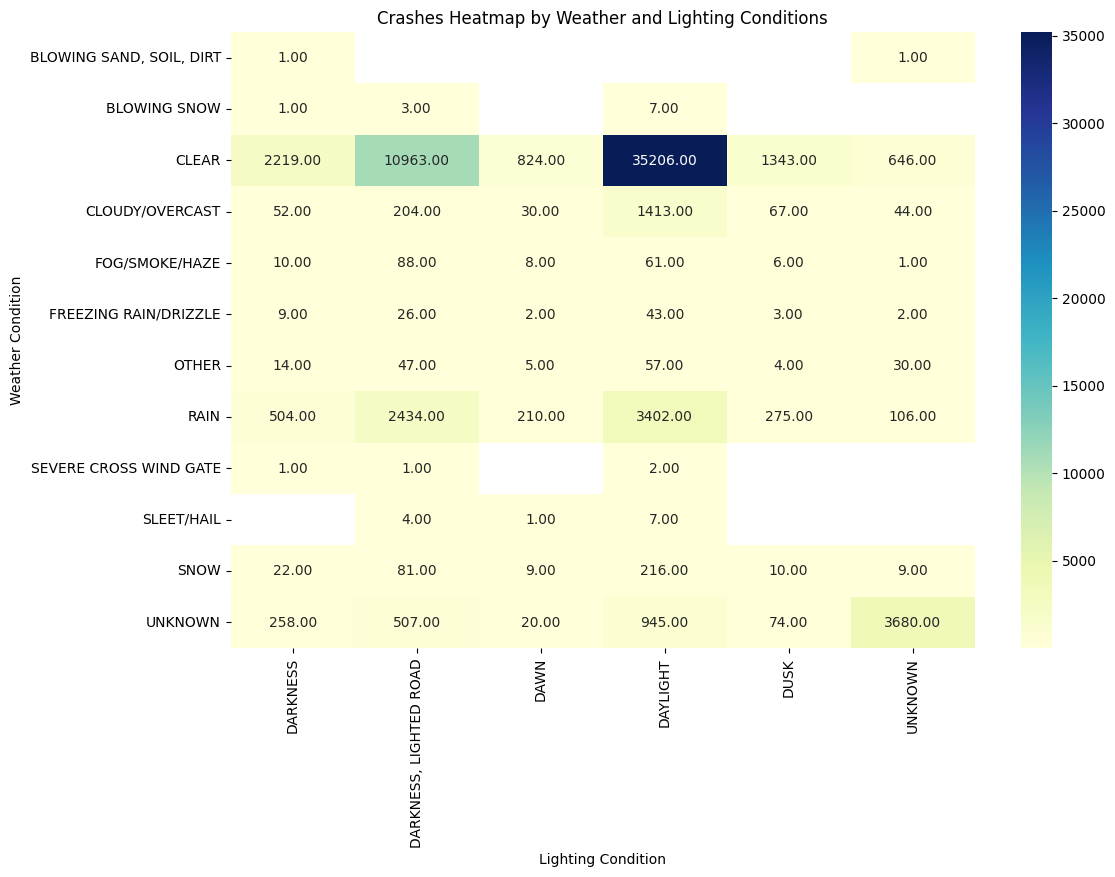

In [41]:
# Creating a pivot table for Weather and Lighting Conditions
weather_conditions = pd.pivot_table(crashes_EDA, index='WEATHER_CONDITION', columns='LIGHTING_CONDITION', values='CRASH_RECORD_ID', aggfunc='count')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(weather_conditions, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Crashes Heatmap by Weather and Lighting Conditions')
plt.xlabel('Lighting Condition')
plt.ylabel('Weather Condition')
plt.show()


## 7. Distribution of Crash Types Across Different Device Conditions Using a Violin Plot

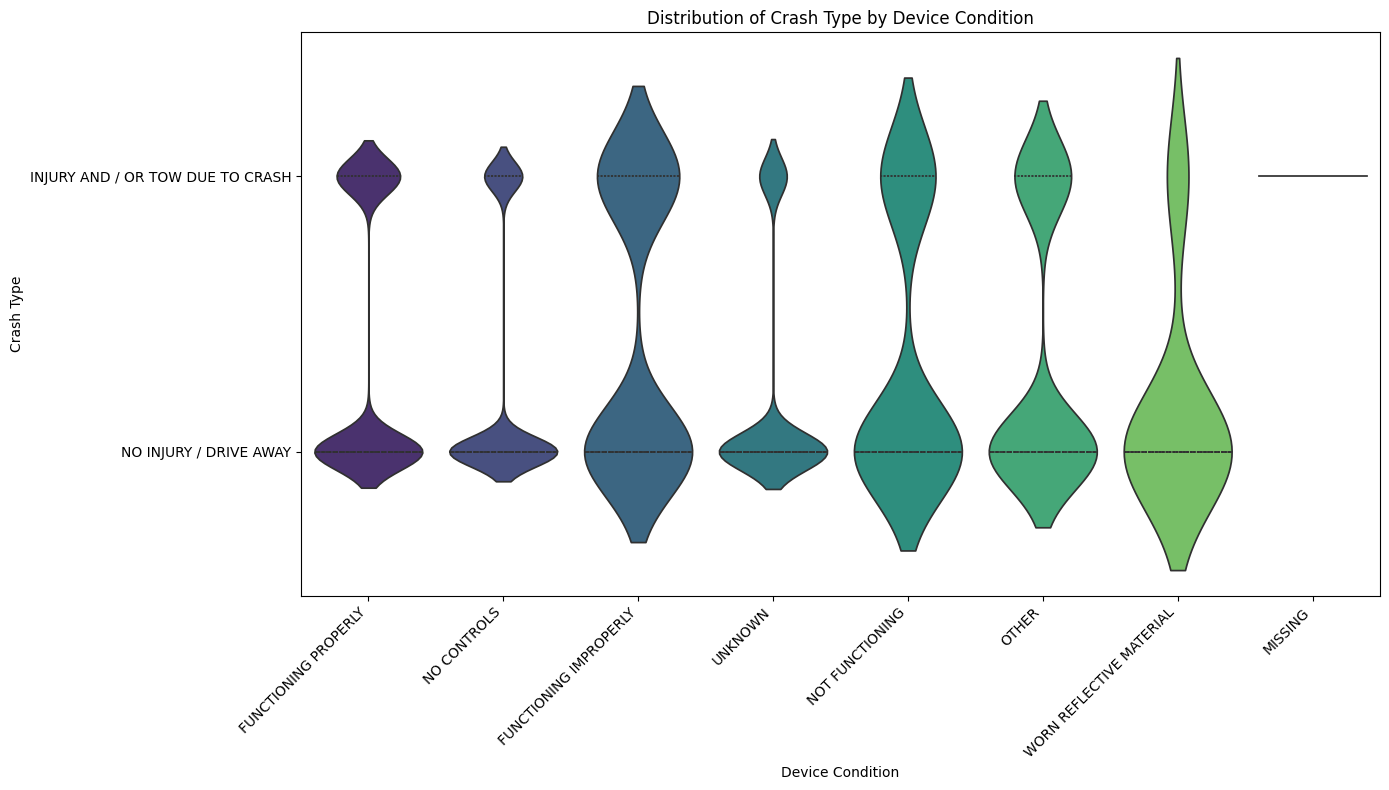

In [42]:
# Plotting a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='DEVICE_CONDITION', y='CRASH_TYPE', data=crashes_EDA, palette='viridis', inner='quartile')
plt.title('Distribution of Crash Type by Device Condition')
plt.xlabel('Device Condition')
plt.ylabel('Crash Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 8. Distribution of Traffic Control Devices in Traffic Accidents

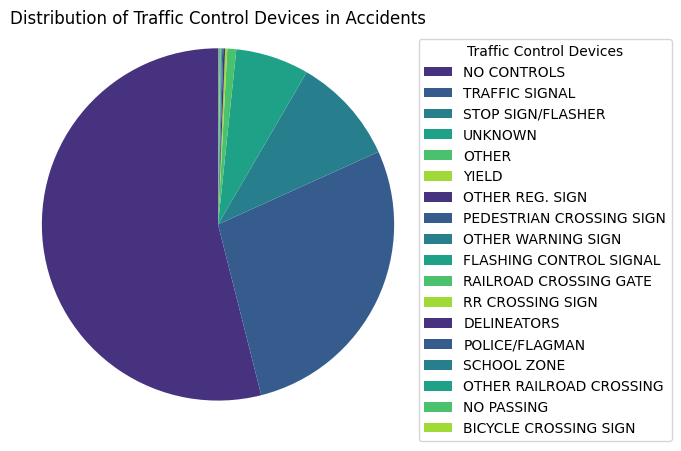

In [43]:
# Count occurrences of each traffic control device
traffic_control_counts = crashes_EDA['TRAFFIC_CONTROL_DEVICE'].value_counts()
colors = sns.color_palette("viridis")

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(traffic_control_counts, startangle=90, colors=colors )
plt.title('Distribution of Traffic Control Devices in Accidents')
plt.legend( traffic_control_counts.index, title="Traffic Control Devices", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal') 
plt.show()


## 9. Distribution of Damage Categories Across Different First Crash Types

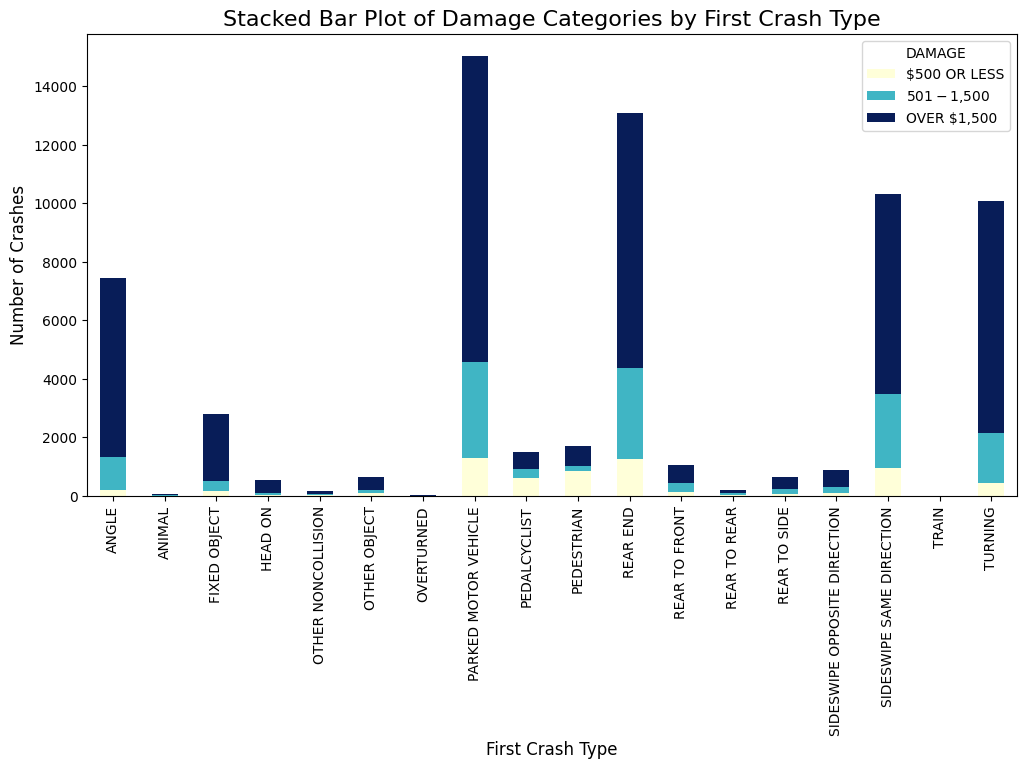

In [44]:
# Create crosstab for damage categories and crash type
damage_by_crash_type = pd.crosstab(crashes_EDA['FIRST_CRASH_TYPE'], crashes_EDA['DAMAGE'])

# Plot stacked bar chart
damage_by_crash_type.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='YlGnBu')
plt.title('Stacked Bar Plot of Damage Categories by First Crash Type', fontsize=16)
plt.xlabel('First Crash Type', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.show()


## 10. Heatmap of crashes_EDA by Road Conditions

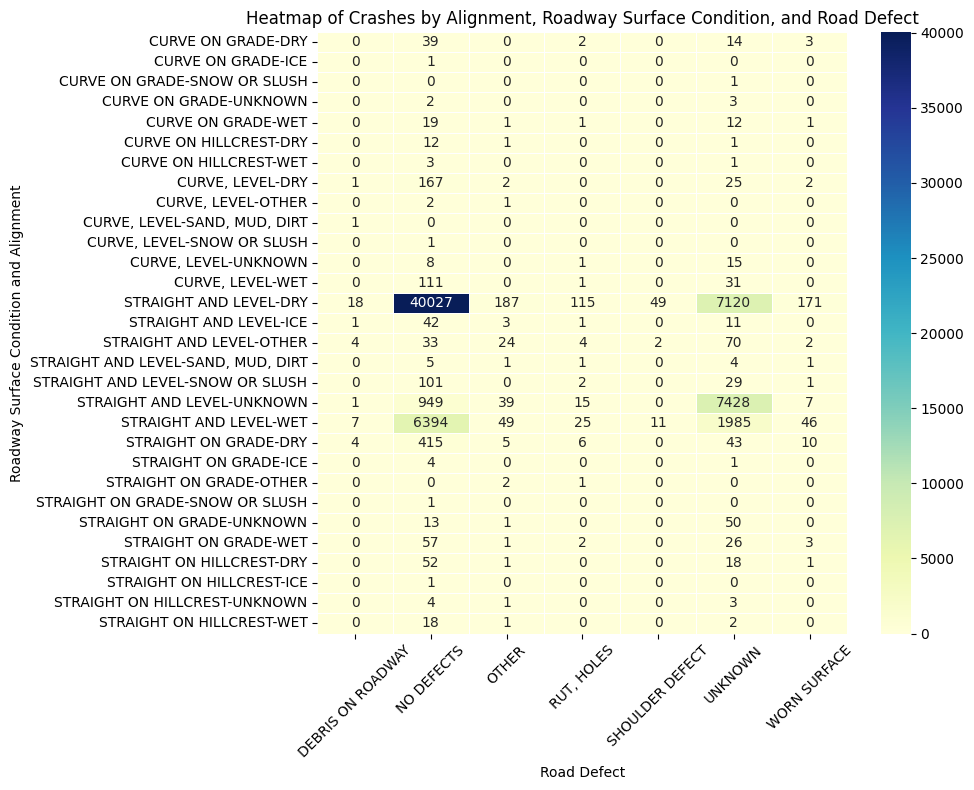

In [45]:
# Group by alignment, roadway surface condition, and road defect
accident_counts = crashes_EDA.groupby(['ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT']).size().unstack(fill_value=0)
#print(accident_counts)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(accident_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Crashes by Alignment, Roadway Surface Condition, and Road Defect')
plt.xlabel('Road Defect')
plt.ylabel('Roadway Surface Condition and Alignment')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 11. Distribution of Most Severe Injuries by First Crash Type

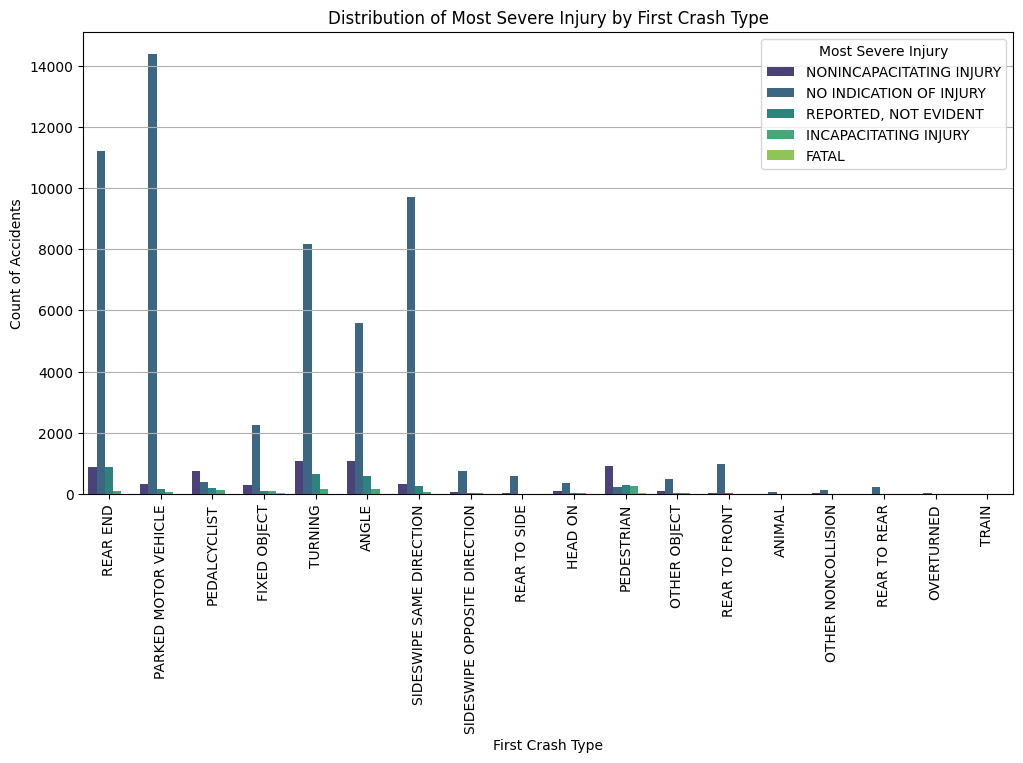

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crashes_EDA, x='FIRST_CRASH_TYPE', hue='MOST_SEVERE_INJURY', palette='viridis')
plt.title('Distribution of Most Severe Injury by First Crash Type')
plt.xlabel('First Crash Type')
plt.ylabel('Count of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Most Severe Injury')
plt.grid(axis='y')
plt.show()


## 12. Correlation Matrix of Traffic Accident Variables

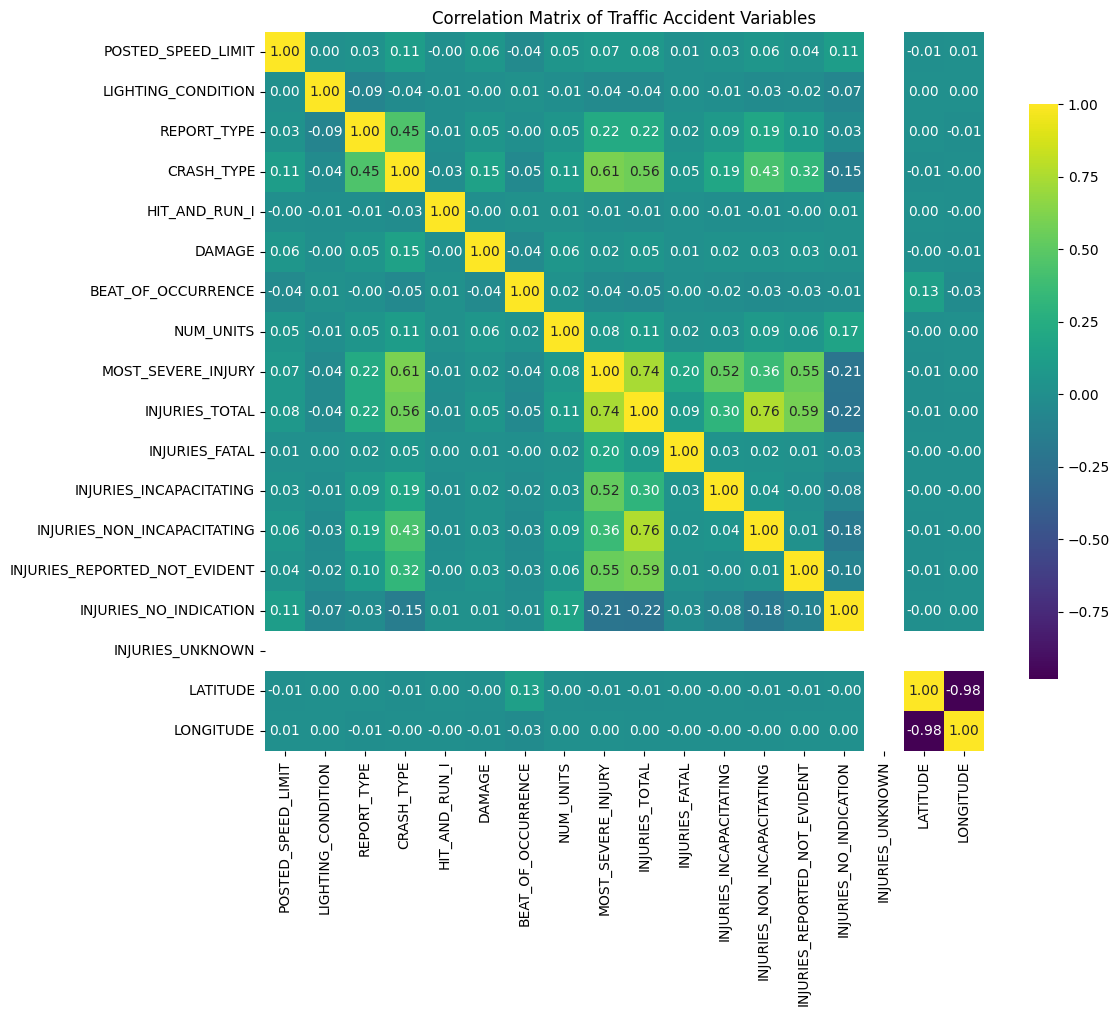

In [47]:
# Calculate the correlation matrix
correlation_matrix = crashes.select_dtypes(include = ['int64','float64']).corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Traffic Accident Variables')
plt.tight_layout()
plt.show()


## 13. Feature Engineering

In [48]:
crashes_EDA['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crashes_EDA['DATE_POLICE_NOTIFIED'])
crashes_EDA['DATE_DIFFERENCE'] = (crashes_EDA['DATE_POLICE_NOTIFIED'] - crashes_EDA['CRASH_DATE']).dt.days

In [49]:
# Group by FIRST_CRASH_TYPE and calculate the mean DATE_DIFFERENCE
avg_date_difference_crash_type = crashes_EDA.groupby('FIRST_CRASH_TYPE')['DATE_DIFFERENCE'].mean().sort_values()

# Convert to DataFrame for easier plotting
avg_date_difference_crash_type = avg_date_difference_crash_type.reset_index()
avg_date_difference_crash_type.columns = ['FIRST_CRASH_TYPE', 'AVG_DATE_DIFFERENCE']


## Analysis of Average Reporting Delay by First Crash Type 

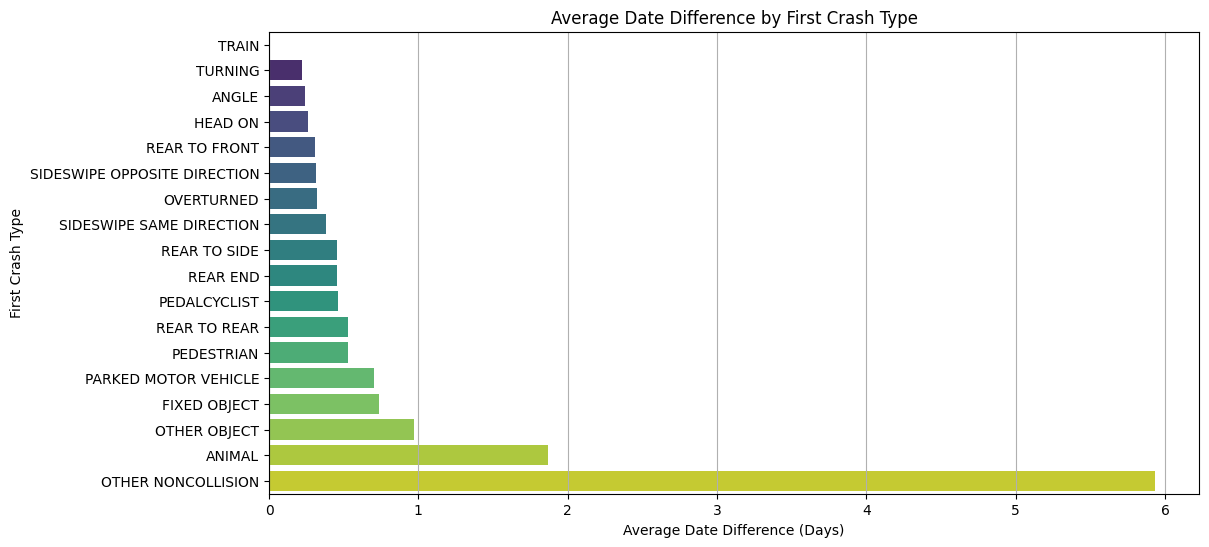

In [50]:
# Plotting the average DATE_DIFFERENCE by FIRST_CRASH_TYPE
plt.figure(figsize=(12, 6))
sns.barplot(x='AVG_DATE_DIFFERENCE', y='FIRST_CRASH_TYPE', data=avg_date_difference_crash_type, palette='viridis')
plt.title('Average Date Difference by First Crash Type')
plt.xlabel('Average Date Difference (Days)')
plt.ylabel('First Crash Type')
plt.grid(axis='x')
plt.show()


## 14. Top 10 Streets with the Highest Number of Traffic Accidents in Chicago

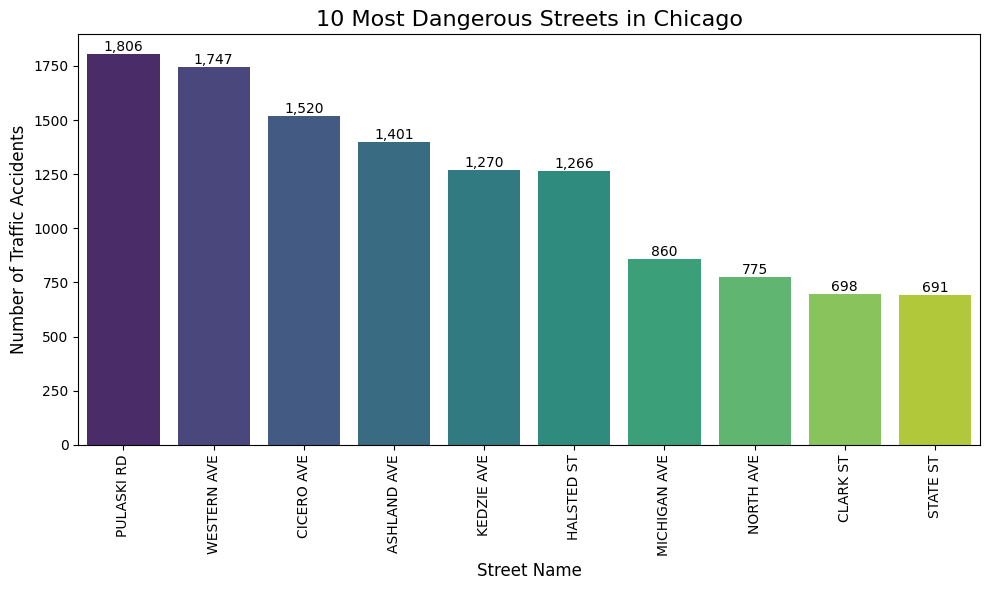

In [51]:
# Grouping the data to count accidents by street name
street_count = crashes_EDA['STREET_NAME'].value_counts().reset_index()
street_count.columns = ['STREET_NAME', 'ACCIDENT_COUNT']
street_count = street_count.sort_values(by='ACCIDENT_COUNT', ascending=False)
top_streets = street_count.head(10) # Selecting the top 10 most dangerous streets

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='STREET_NAME', y='ACCIDENT_COUNT', data=top_streets, palette='viridis')
plt.title('10 Most Dangerous Streets in Chicago', fontsize=16)
plt.xlabel('Street Name', fontsize=12)
plt.ylabel('Number of Traffic Accidents', fontsize=12)
plt.xticks(rotation=90)

# Adding the accident count on top of each bar
for index, value in enumerate(top_streets['ACCIDENT_COUNT']):
    plt.text(index, value, f'{value:,}', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()